<img src=https://api-manager.universia.net/coreplatform-document-management/api/document-management/public/6ra7ymjkfi64845 width="300" align="left">
<br />

# Aprendizaje automático I
#### <font color=green>*Máster en Informática Industrial y Robótica*</font>

# Tema 4: Comparación de modelos

#### Ejemplo de uso de contrastes de hipótesis para la comparación de múltiples modelos

#### Importación de las librerías:

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

#### Lectura de los datos del Iris:

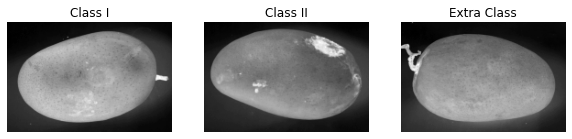

In [49]:
# generate random integer values
from random import seed
from random import randint
import os
r = 120
c = 180
# seed random number generator
seed(1)

input_images_path = "./Dataset/Grading_dataset/Class_I"
img_names = os.listdir(input_images_path)
n = len(img_names)
class1 = np.zeros([n, r, c])
t1 = np.zeros(n)
for i in range(0, n-1, 1):
    img = resize(rgb2gray(imread("./Dataset/Grading_dataset/Class_I/" + img_names[i])), (r, c))
    class1[i] = img
    t1[i] = 1

input_images_path = "./Dataset/Grading_dataset/Class_II"
img_names = os.listdir(input_images_path)
n = len(img_names)
class2 = np.zeros([n, r, c])
t1 = np.zeros(n)
for i in range(0, n-1, 1):
    img = resize(rgb2gray(imread("./Dataset/Grading_dataset/Class_II/" + img_names[i])), (r, c))
    class2[i] = img
    t1[i] = 2

input_images_path = "./Dataset/Grading_dataset/Extra_Class"
img_names = os.listdir(input_images_path)
n = len(img_names)
extra_class = np.zeros([n, r, c])
t1 = np.zeros(n)
for i in range(0, n-1, 1):
    img = resize(rgb2gray(imread("./Dataset/Grading_dataset/Extra_Class/" + img_names[i])), (r, c))
    extra_class[i] = img
    t1[i] = 0

plt.figure(figsize=(10,8))
plt.subplot(1,3,1) # 1 - numrows, 3 - numcols, 1 - image index
plt.imshow(class1[randint(0, 200)], cmap=plt.cm.gray_r) 
plt.axis('off')
plt.title('Class I')
plt.subplot(1,3,2) # # 1 - numrows, 3 - numcols, 2 - image index
plt.imshow(class2[randint(0, 200)], cmap=plt.cm.gray_r)
plt.axis('off')
plt.title('Class II')
plt.subplot(1,3,3) # # 1 - numrows, 3 - numcols, 3 - image index
plt.imshow(extra_class[randint(0, 200)], cmap=plt.cm.gray_r)
plt.axis('off')
plt.title('Extra Class')
plt.show()

#### Validación cruzada de los modelos (Logistic Regression, LDA y KNN):

In [ ]:
CV = 20
scoring = ['precision_macro', 'recall_macro', 'precision_micro', 'recall_micro', 'f1_macro','accuracy']

modelLR = LogisticRegression(penalty='none', solver = 'lbfgs', max_iter=10000, multi_class='multinomial')
scoresLR = cross_validate(modelLR, X, t, cv=CV, scoring=scoring)
print('Media del LR  : ', np.mean(scoresLR['test_accuracy']))

modelLDA = LinearDiscriminantAnalysis()
scoresLDA = cross_validate(modelLDA, X, t, cv=CV, scoring=scoring)
print('Media del LDA : ', np.mean(scoresLDA['test_accuracy']))

modelKNN = KNeighborsClassifier(n_neighbors=71)
scoresKNN = cross_validate(modelKNN, X, t, cv=CV, scoring=scoring)
print('Media del KNN : ', np.mean(scoresKNN['test_accuracy']))

Media del LR  :  0.9785714285714286
Media del LDA :  0.9785714285714286
Media del KNN :  0.9794642857142858


#### Se muestra un diagrama de cajas con los resultados de la validación cruzada:

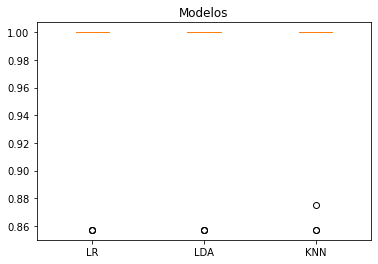

In [ ]:
data = [scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy']]
fig7, ax = plt.subplots()
ax.set_title('Modelos')
ax.boxplot(data,labels=['LR','LDA','KNN']);

#### Contraste de hipótesis:

Primero se muestran los resultados obtenidos aplicando el test de [Kruskall-Wallis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal) y el test de [Anova](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). Si se rechaza la hipótesis, entonces se puede afirmar que los modelos son diferentes y, posteriormente, se aplican dos test de comparación múltiple mediante el uso de la clase [MultiComparison](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html). Estos métodos comprueban si hay diferencias significativas con un p<0.05, corrigiendo el hecho de que se están haciendo múltiples comparaciones que normalmente aumentarían la probabilidad de que se identifique una diferencia significativa. Un resultado de "reject = true" significa que se ha observado una diferencia significativa:
- Método de Tukey. Se emplea para ello la función [tukeyhsd](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.tukeyhsd.html#statsmodels.sandbox.stats.multicomp.MultiComparison.tukeyhsd).
- Método de Holm-Bonferroni. Se emplea para ello la función [allpairtest](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest.html#statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest)

In [ ]:
alpha = 0.05
F_statistic, pVal = stats.kruskal(scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy'])
F_statistic2, pVal2 = stats.f_oneway(scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy'])
print ('p-valor KrusW:', pVal)
print ('p-valor ANOVA:', pVal2)
if pVal <= alpha:
    print('Rechazamos la hipótesis: los modelos son diferentes\n')
    stacked_data = np.vstack((scoresLR['test_accuracy'],scoresLDA['test_accuracy'],scoresKNN['test_accuracy'])).ravel()
    stacked_model = np.vstack((np.repeat('modelLR',CV),np.repeat('modelLDA',CV),np.repeat('modelKNN',CV))).ravel()    
    MultiComp = MultiComparison(stacked_data, stacked_model)
    comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')
    print (comp[0])    
    print(MultiComp.tukeyhsd(alpha=0.05))
else:
    print('Aceptamos la hipótesis: los modelos son iguales')

p-valor KrusW: 0.9971195411207237
p-valor ANOVA: 0.9980102287819356
Aceptamos la hipótesis: los modelos son iguales
